In [1]:
import fitsio
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

from astropy.table import Table
from gold_footprint import gold_footprint
from astropy.coordinates import SkyCoord
from astropy import units as u
from selection.tomog import tomog

In [2]:
yeche = Table.read('/global/u2/y/yeche/LBG/LBG_targets_in_COSMOS.fits')

In [3]:
yeche.pprint()

        RA                DEC         PMRA PMDEC ... g_err   r    r_err photo_z
------------------ ------------------ ---- ----- ... ----- ------ ----- -------
149.49003311510504  2.886386126934052  0.0   0.0 ... 0.025 24.364 0.024  2.6515
149.49897946837575 2.8957199805301594  0.0   0.0 ... 0.021 24.329 0.024  2.8696
149.51497696711988  2.898329474252068  0.0   0.0 ... 0.014 23.737 0.016  0.0975
149.49949379331122 2.8968090596402205  0.0   0.0 ...  0.03 23.025 0.027  2.9111
 149.5711060029605  2.905573044289271  0.0   0.0 ... 0.082 23.898 0.073  2.6466
 149.5814422678106  2.905606383321363  0.0   0.0 ... 0.058 24.306 0.069  2.6091
149.57960196493113 2.9055795730613654  0.0   0.0 ... 0.066 23.845 0.083  3.1752
149.58499252303005  2.905580018805254  0.0   0.0 ... 0.059 24.348 0.078  2.6343
 149.5768199404382  2.905598518583442  0.0   0.0 ... 0.056 23.784 0.056  3.1246
149.50309811178028 2.9108575586615792  0.0   0.0 ... 0.013 23.897 0.016   2.769
               ...                ...  .

In [4]:
bxu = Table.read('/global/cscratch1/sd/mjwilson/DESILBG/GOLD/DESILBG_BXU/desilbg_bxu.fits')
bxu.pprint()

   ID           RA                DEC         MASK ... Ks_err Z_BC03 Z_SPEC IDX
------- ------------------ ------------------ ---- ... ------ ------ ------ ---
   8419  149.4617628929257 2.9903850477809484    0 ... 1000.0 2.4898  -99.0   1
  88187 149.37526777692952 2.9556887260343148    0 ... 1000.0 0.2746  -99.0   1
 100735 149.37250768438415  3.080247775303863    0 ... 1000.0 3.7247  -99.0   1
 106891 149.26462324656055  3.138785382887629    0 ... 1000.0 3.3393  -99.0   1
 111902 149.40201064798677  3.188692373436244    0 ... 1000.0 0.2653  -99.0   1
 179692  149.2142386139038  3.035434124404831    0 ... 1000.0 2.8799  -99.0   1
 187353 149.21004001927372 3.1048311728256377    0 ... 1000.0 2.6679  -99.0   1
 207591 149.06917248324245  3.295965274880494    0 ... 1000.0 1.4065  -99.0   1
 281969 148.94066654619888 3.1817781279042285    0 ... 1000.0 2.0169  -99.0   1
 446575 151.00575262947734   2.99755764912408    0 ... 1000.0 2.8128  -99.0   1
    ...                ...              

In [5]:
tmg = Table.read('/global/cscratch1/sd/mjwilson/DESILBG/GOLD/DESILBG_TMG/desilbg_tmg.fits')
tmg.pprint()

   ID           RA                DEC         MASK ... Ks_err Z_BC03 Z_SPEC IDX
------- ------------------ ------------------ ---- ... ------ ------ ------ ---
2701593 150.61330155313811 1.2814882473135494    0 ... 1000.0 2.4626  -99.0 -99
1289080 151.24121601922798 3.1684822801157484    0 ... 1000.0 3.0897  -99.0 -99
 187353 149.21004001927372 3.1048311728256377    0 ... 1000.0 2.6679  -99.0 -99
2919769 149.25140478616885 1.6349077897107656    0 ...  -99.0 2.3008  -99.0 -99
2587844 150.81978916811246  1.037446131173854    0 ... 1000.0 2.7165  -99.0 -99
2721046 150.55870751605624 1.4665748703386872    0 ... 1000.0 0.0752  -99.0 -99
2439584 151.05095140422483 1.3016694434432885    0 ... 1000.0  2.168  -99.0 -99
3152525   149.085246562989 2.5353920332608824    0 ... 1000.0 3.0584  -99.0 -99
3608051  150.9514481905834  2.722157928013797    0 ... 1000.0 0.0849  -99.0 -99
2580672 150.66439542483775 0.9610411711425428    0 ... 1000.0   2.38  -99.0 -99
    ...                ...              

In [6]:
print(tmg['r'].min(), tmg['r'].max())

22.501 23.749


In [7]:
assert np.all(yeche['REF_EPOCH'] == 0.0)
assert np.all(yeche['PMRA'] == 0.0)
assert np.all(yeche['PMDEC'] == 0.0)

In [8]:
scnd_bxu = Table.read('/global/cscratch1/sd/mjwilson/DESILBG/GOLD/DESILBG_BXU/desilbg_bxu_scnd.fits')
scnd_gdrops = Table.read('/global/cscratch1/sd/mjwilson/DESILBG/GOLD/DESILBG_G/desilbg_g_scnd.fits')
scnd_tmg = Table.read('/global/cscratch1/sd/mjwilson/DESILBG/GOLD/DESILBG_TMG/desilbg_tmg_scnd.fits')

In [9]:
gdrops = Table.read('/global/cscratch1/sd/mjwilson/DESILBG/GOLD/DESILBG_G/desilbg_g.fits')

In [10]:
clauds = Table.read('/global/cscratch1/sd/mjwilson/clauds/March2021/COSMOS_v9_v210225.fits')

In [11]:
stars= Table.read('/global/cscratch1/sd/mjwilson/stars/stars.fits')

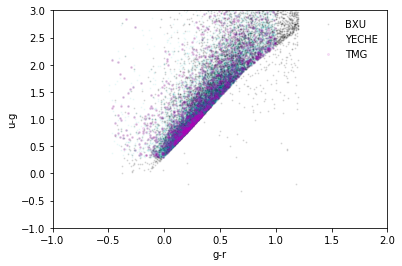

In [13]:
pl.plot(bxu['g']   - bxu['r'], bxu['u'] - bxu['g'], marker='.', lw=0., c='k', markersize=2, alpha=0.1, label='BXU')
pl.plot(yeche['g'] - yeche['r'], yeche['u'] - yeche['g'], marker='.', lw=0., c='c', markersize=2, alpha=0.05, label='YECHE')
pl.plot(tmg['g']   - tmg['r'], tmg['u'] - tmg['g'], marker='.', lw=0., c='m', markersize=4, alpha=0.1, label='TMG')

pl.xlabel('g-r')
pl.ylabel('u-g')

pl.xlim((-1.0,2.0))
pl.ylim((-1.0,3.0))

pl.legend(frameon=False)

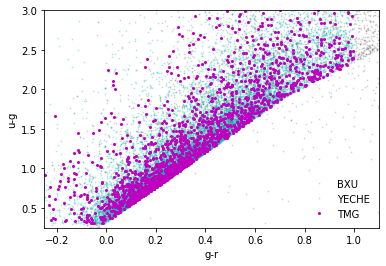

In [16]:
pl.plot(bxu['g']   - bxu['r'], bxu['u'] - bxu['g'], marker='.', lw=0., c='k', markersize=2, alpha=0.1, label='BXU')
pl.plot(yeche['g'] - yeche['r'], yeche['u'] - yeche['g'], marker='.', lw=0., c='c', markersize=2, alpha=0.2, label='YECHE')
pl.plot(tmg['g']   - tmg['r'], tmg['u'] - tmg['g'], marker='.', lw=0., c='m', markersize=4, alpha=1., label='TMG')

pl.xlabel('g-r')
pl.ylabel('u-g')

pl.xlim((-0.25,1.1))
pl.ylim((0.25, 3.0))

pl.legend(frameon=False)

# Adam says to set this to True

In [17]:
assert np.all(yeche['OVERRIDE'] == False)

In [18]:
in_goldfootprint = gold_footprint(yeche)

In [19]:
np.count_nonzero(in_goldfootprint)

8846

Text(0, 0.5, 'DEC')

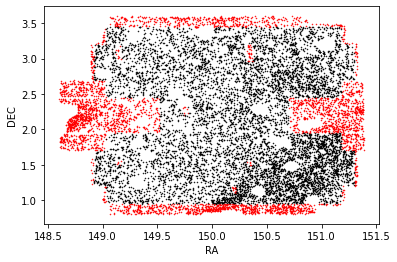

In [20]:
pl.plot(yeche['RA'][~in_goldfootprint], yeche['DEC'][~in_goldfootprint], marker='.', lw=0.0, markersize=1, c='r')
pl.plot(yeche['RA'][in_goldfootprint], yeche['DEC'][in_goldfootprint], marker='.', lw=0.0, markersize=1, c='k')

pl.xlabel('RA')
pl.ylabel('DEC')

# Limit to within the gold footprint.

In [21]:
gold_yeche = yeche[in_goldfootprint]

In [22]:
assert len(gold_yeche) == 8846

In [23]:
sc_gold_yeche = SkyCoord(ra=gold_yeche['RA']*u.degree, dec=gold_yeche['DEC']*u.degree)
sc_bxu        = SkyCoord(ra=bxu['RA']*u.degree, dec=bxu['DEC']*u.degree)

# TMG is the larger catalog
idx, d2d, d3d = sc_gold_yeche.match_to_catalog_sky(sc_bxu)

In [24]:
matched       = gold_yeche[d2d.arcsecond < 1.0]

# Fraction of yeche catalog in footprint that is matched. 

In [25]:
100. * len(matched) / len(gold_yeche)

94.58512321953425

In [26]:
matched.sort('RA')

In [27]:
matched_tmg = Table(bxu[idx][d2d.arcsecond < 1.0], copy=True)

In [28]:
matched_tmg.sort('RA')

In [29]:
matched

RA,DEC,PMRA,PMDEC,REF_EPOCH,OVERRIDE,u,u_err,g,g_err,r,r_err,photo_z
float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64
148.9200722757402,2.9685136819814755,0.0,0.0,0.0,False,26.388,0.09,24.61,0.024,24.071,0.018,2.9332
148.9208689872771,2.708677461383682,0.0,0.0,0.0,False,27.093,0.662,24.923,0.062,24.324,0.046,3.0999
148.92127014227444,1.2570191348137032,0.0,0.0,0.0,False,26.397,0.09,24.369,0.023,23.807,0.017,2.9693
148.92270654601782,2.799023197178508,0.0,0.0,0.0,False,24.101,0.034,23.344,0.028,23.386,0.08,1.8986
148.92286793099012,2.7417897255411505,0.0,0.0,0.0,False,27.162,0.267,25.11,0.055,24.359,0.036,2.9583
148.9230025330549,2.965771717241044,0.0,0.0,0.0,False,25.797,0.076,24.429,0.03,23.994,0.025,2.7992
148.92334292844242,1.245521970031794,0.0,0.0,0.0,False,27.867,0.346,25.031,0.038,24.165,0.022,3.1731
148.92360510393664,3.0166882159511923,0.0,0.0,0.0,False,25.227,0.065,23.92,0.034,23.949,0.049,2.3526
148.9245201710496,2.77305755925787,0.0,0.0,0.0,False,27.061,0.22,24.929,0.043,24.421,0.035,2.9667


In [30]:
matched_tmg

ID,RA,DEC,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],EB_V,u,uS,g,r,i,z,y,Yv,J,H,Ks,u_err,uS_err,g_err,r_err,i_err,z_err,y_err,Yv_err,J_err,H_err,Ks_err,Z_BC03,Z_SPEC,IDX
int64,float64,float64,int16,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
260119,148.9200722757402,2.9685136819814755,0,3,True .. False,0.020133005558671792,26.388,-99.094,24.61,24.071,23.983,23.964,23.959,-99.024,-99.018,-99.011,-99.007,0.09,1000.0,0.024,0.018,0.023,0.035,0.083,1000.0,1000.0,1000.0,1000.0,2.9332,-99.0,7
3286599,148.9208689872771,2.708677461383682,0,3,True .. False,0.027608318065230383,27.093,-99.129,24.923,24.324,24.173,24.266,24.192,-99.033,-99.024,-99.016,-99.01,0.662,-99.0,0.062,0.046,0.054,0.087,0.208,1000.0,1000.0,1000.0,1000.0,3.0999,-99.0,8
1403951,148.92127014227444,1.2570191348137032,0,3,True .. False,0.02128436302864014,26.397,-99.099,24.369,23.807,23.697,23.542,23.58,-99.026,-99.019,-99.012,-99.008,0.09,1000.0,0.023,0.017,0.02,0.027,0.067,1000.0,1000.0,1000.0,1000.0,2.9693,-99.0,6
3296028,148.92270654601782,2.799023197178508,0,3,True .. False,0.025178158513045685,24.101,-99.118,23.344,23.386,22.464,22.07,22.104,-99.03,-99.022,-99.014,-99.009,0.034,-99.0,0.028,0.08,0.047,0.032,0.075,1000.0,1000.0,1000.0,1000.0,1.8986,-99.0,4
3290056,148.92286793099012,2.7417897255411505,0,3,True .. False,0.026817884997812142,27.162,-99.125,25.11,24.359,24.362,24.248,24.1,-99.032,-99.023,-99.015,-99.01,0.267,-99.0,0.055,0.036,0.047,0.062,0.129,1000.0,1000.0,1000.0,1000.0,2.9583,-99.0,8
259850,148.9230025330549,2.965771717241044,0,3,True .. False,0.020191725230625977,25.797,-99.094,24.429,23.994,23.941,23.818,23.95,-99.024,-99.018,-99.011,-99.007,0.076,1000.0,0.03,0.025,0.033,0.045,0.117,1000.0,1000.0,1000.0,1000.0,2.7992,-99.0,6
1402909,148.92334292844242,1.245521970031794,0,3,True .. False,0.021465795034579276,27.867,-99.1,25.031,24.165,23.903,23.886,23.949,-99.026,-99.019,-99.012,-99.008,0.346,1000.0,0.038,0.022,0.023,0.034,0.088,1000.0,1000.0,1000.0,1000.0,3.1731,-99.0,7
267147,148.92360510393664,3.0166882159511923,0,3,True .. False,0.019365654289161045,25.227,-99.09,23.92,23.949,23.617,23.356,23.116,-99.023,-99.017,-99.011,-99.007,0.065,1000.0,0.034,0.049,0.052,0.056,0.103,1000.0,1000.0,1000.0,1000.0,2.3526,-99.0,6
3293563,148.9245201710496,2.77305755925787,0,3,True .. False,0.025841283957178537,27.061,-99.121,24.929,24.421,24.314,24.108,24.191,-99.031,-99.023,-99.015,-99.009,0.22,-99.0,0.043,0.035,0.042,0.051,0.136,1000.0,1000.0,1000.0,1000.0,2.9667,-99.0,8


In [31]:
assert np.all(matched['RA'] == matched_tmg['RA'])
assert np.all(matched['DEC'] == matched_tmg['DEC'])

In [32]:
matched_scnd_bxu = scnd_bxu[idx][d2d.arcsecond < 1.0]
matched_scnd_bxu.sort('RA')

In [33]:
assert np.all(matched_scnd_bxu['PMRA'] == matched['PMRA'])
assert np.all(matched_scnd_bxu['PMDEC'] == matched['PMDEC'])
assert np.all(matched_scnd_bxu['REF_EPOCH'] == matched['REF_EPOCH'])

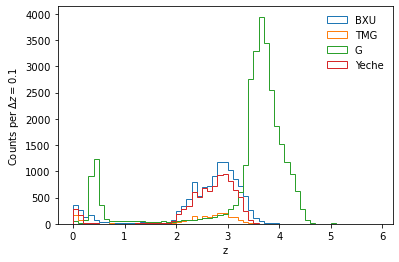

In [34]:
_ = pl.hist(bxu['Z_BC03'], bins=np.arange(0., 6., 0.1), histtype='step', label='BXU')
_ = pl.hist(tmg['Z_BC03'], bins=np.arange(0., 6., 0.1), histtype='step', label='TMG')
_ = pl.hist(gdrops['Z_BC03'], bins=np.arange(0., 6., 0.1), histtype='step', label='G')
_ = pl.hist(gold_yeche['photo_z'], bins=np.arange(0., 6., 0.1), histtype='step', label='Yeche')

pl.xlabel('z')
pl.ylabel('Counts per $\Delta z ={:.1f}$'.format(0.1))

pl.legend(frameon=False)

In [35]:
unmatched = gold_yeche[d2d.arcsecond > 1.0]

In [36]:
unmatched.pprint()

        RA                DEC         PMRA PMDEC ... g_err   r    r_err photo_z
------------------ ------------------ ---- ----- ... ----- ------ ----- -------
149.49003311510504  2.886386126934052  0.0   0.0 ... 0.025 24.364 0.024  2.6515
149.47469442276244  2.983694875351901  0.0   0.0 ... 0.031 24.335 0.024  2.9575
149.52892881809962  3.014739783175517  0.0   0.0 ... 0.026 24.125 0.018  3.0384
 149.5505713223367   3.27218572105432  0.0   0.0 ...  0.04 24.458 0.033  2.8536
149.37315767307558  3.069108208791664  0.0   0.0 ... 0.162 24.143 0.243  2.6413
149.28312843095304  3.110003308303997  0.0   0.0 ... 0.012 23.704 0.014  2.4456
 149.3469131946425  3.213318656506559  0.0   0.0 ... 0.023  24.28 0.028  2.0899
149.33852754166293  3.212623555936589  0.0   0.0 ... 0.019 23.791 0.021  2.2241
149.40217097602277  3.430622017413689  0.0   0.0 ... 0.036 24.335 0.026  2.8882
149.09706704731178  3.235564813203859  0.0   0.0 ... 0.042 24.238 0.027   2.956
               ...                ...  .

(0.7, 3.6)

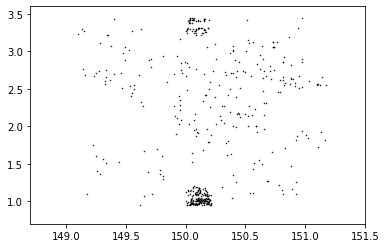

In [37]:
pl.plot(unmatched['RA'], unmatched['DEC'], marker='.', lw=0.0, c='k', markersize=1)

# pl.axhline(3.20, c='k', lw=0.15)
# pl.axhline(1.20, c='k', lw=0.15)
# pl.axvline(150.00, c='k', lw=0.15)
# pl.axvline(150.22, c='k', lw=0.15)

pl.xlim(148.7, 151.5)
pl.ylim(0.7, 3.6)

In [38]:
sc_unmatched = SkyCoord(ra=unmatched['RA']*u.degree, dec=unmatched['DEC']*u.degree)
sc_clauds    = SkyCoord(ra=clauds['RA']*u.degree, dec=clauds['DEC']*u.degree)

# TMG is the larger catalog
idx, d2d, d3d = sc_unmatched.match_to_catalog_sky(sc_clauds)

In [39]:
np.mean(d2d.arcsecond < 1.0)

1.0

In [40]:
unmatched = clauds[idx]
unmatched.pprint()

   ID           RA                DEC         ...    VMAX_i     VMAX_Ks  
------- ------------------ ------------------ ... ----------- -----------
    327 149.49003311510504  2.886386126934052 ...         0.0         0.0
   7864 149.47469442276244  2.983694875351901 ...         0.0         0.0
  11963 149.52892881809962  3.014739783175517 ...         0.0         0.0
  34938  149.5505713223367   3.27218572105432 ...         0.0         0.0
  96222 149.37315767307558  3.069108208791664 ...         0.0         0.0
 103758 149.28312843095304  3.110003308303997 ...         0.0         0.0
 113532  149.3469131946425  3.213318656506559 ...         0.0         0.0
 113717 149.33852754166293  3.212623555936589 ...         0.0         0.0
 135080 149.40217097602277  3.430622017413689 ...         0.0         0.0
 201333 149.09706704731178  3.235564813203859 ...         0.0         0.0
    ...                ...                ... ...         ...         ...
4843386 149.71050968559575  2.78657743

In [41]:
np.count_nonzero(unmatched['FLAG_FIELD_BINARY'][:,1] == False)

230

In [42]:
unmatched = unmatched[unmatched['FLAG_FIELD_BINARY'][:,1] == True]
unmatched

ID,RA,DEC,TRACT,PATCH,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],A_WORLD,B_WORLD,KRON_RADIUS,THETA_WORLD,ELONGATION,ELLIPTICITY,EB_V,FWHM_WORLD_HSC_I,MU_MAX_HSC_I,CLASS_STAR_HSC_I,FLUX_RADIUS_0.25_HSC_I,FLUX_RADIUS_0.5_HSC_I,FLUX_RADIUS_0.75_HSC_I,FUV,NUV,u,uS,g,r,i,z,y,Yv,J,H,Ks,FUV_err,NUV_err,u_err,uS_err,g_err,r_err,i_err,z_err,y_err,Yv_err,J_err,H_err,Ks_err,MAG_APER_2s_u,MAG_APER_2s_uS,MAG_APER_2s_g,MAG_APER_2s_r,MAG_APER_2s_i,MAG_APER_2s_z,MAG_APER_2s_y,MAG_APER_2s_Yv,MAG_APER_2s_J,MAG_APER_2s_H,MAG_APER_2s_Ks,MAGERR_APER_2s_u,MAGERR_APER_2s_uS,MAGERR_APER_2s_g,MAGERR_APER_2s_r,MAGERR_APER_2s_i,MAGERR_APER_2s_z,MAGERR_APER_2s_y,MAGERR_APER_2s_Yv,MAGERR_APER_2s_J,MAGERR_APER_2s_H,MAGERR_APER_2s_Ks,MAG_APER_3s_u,MAG_APER_3s_uS,MAG_APER_3s_g,MAG_APER_3s_r,MAG_APER_3s_i,MAG_APER_3s_z,MAG_APER_3s_y,MAG_APER_3s_Yv,MAG_APER_3s_J,MAG_APER_3s_H,MAG_APER_3s_Ks,MAGERR_APER_3s_u,MAGERR_APER_3s_uS,MAGERR_APER_3s_g,MAGERR_APER_3s_r,MAGERR_APER_3s_i,MAGERR_APER_3s_z,MAGERR_APER_3s_y,MAGERR_APER_3s_Yv,MAGERR_APER_3s_J,MAGERR_APER_3s_H,MAGERR_APER_3s_Ks,OFFSET_MAG_2s,OFFSET_MAG_3s,CONTEXT,MAG_ABS_FUV,MAG_ABS_NUV,MAG_ABS_u,MAG_ABS_uS,MAG_ABS_g,MAG_ABS_r,MAG_ABS_i,MAG_ABS_z,MAG_ABS_y,MAG_ABS_Yv,MAG_ABS_J,MAG_ABS_H,MAG_ABS_Ks,Z_SPEC,Z_BEST,Z_BEST68_LOW,Z_BEST68_HIGH,NBAND_USED,CHI_BEST,CHI_STAR,CHI_QSO,MOD_BEST,MOD_STAR,MOD_QSO,Z_ML,Z_ML68_LOW,Z_ML68_HIGH,Z_SEC,Z_QSO,Z_BC03,ZPHOT,MOD_BEST_BC03,AGE_BEST,EBV_BEST,EXTLAW_BEST,AGE_MED,MASS_MED,MASS_BEST,MASS_INF,MASS_SUP,SFR_MED,SFR_BEST,SFR_INF,SFR_SUP,SSFR_MED,SSFR_BEST,SSFR_INF,SSFR_SUP,LUM_NUV_BEST,LUM_R_BEST,LUM_K_BEST,OBJ_TYPE,COMPACT,STAR_FORMING,NrK,IRX_NrK,LIR_NrK,SFR_NrK,VMAX_uS,VMAX_g,VMAX_r,VMAX_i,VMAX_Ks
int64,float64,float64,int64,bytes3,int16,int16,bool,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
327,149.49003311510504,2.886386126934052,10054,"0,0",0,7,True .. False,0.00018408797,0.00012604082,4.0,-0.5266879,1.4605037,0.31530473,0.017291495317962605,0.0005147155,24.614271,0.12265367,1.3314801,2.0107799,2.5917718,-99.0,-99.0,26.32,26.309,24.883,24.364,24.223,24.025,23.729,-99.021,-99.015,-99.01,-99.006,-99.0,-99.0,0.095,0.123,0.025,0.024,0.026,0.032,0.054,1000.0,1000.0,1000.0,1000.0,26.646076,26.633411,25.189297,24.654188,24.500963,24.294157,23.994839,-99.0,-99.0,-99.0,-99.0,0.09509277,0.12335205,0.025299072,0.02418518,0.025665283,0.03189087,0.05419922,1000.0,1000.0,1000.0,1000.0,26.384157,26.300714,24.992989,24.477257,24.311932,24.084084,23.745996,-99.0,-99.0,-99.0,-99.0,0.09082031,0.11065674,0.025680542,0.025024414,0.026275635,0.03201294,0.052581787,1000.0,1000.0,1000.0,1000.0,-0.24331936378184524,-0.04614326164332014,2047.0,-20.773,-21.204,-22.414,-22.637,-23.391,-23.869,-24.224,-24.466,-24.588,-24.629,-24.768,-25.011,-24.857,-99.0,2.5622,2.5124,2.7269,11,1.61985,18.5293,4.08188,18,68,4,2.6515,2.5654,2.7182,-99.0,2.58,2.6515,2.6515,5,2300000000.0,0.3,1,844210000.0,10.6925

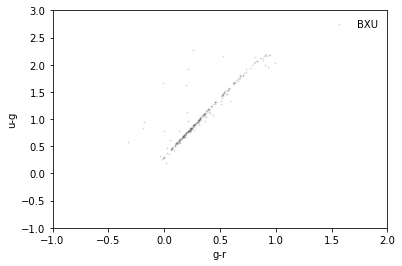

In [43]:
pl.plot(unmatched['g'] - unmatched['r'], unmatched['u'] - unmatched['g'], marker='.', lw=0., c='k', markersize=2, alpha=0.1, label='BXU')

pl.xlim((-1.0, 2.0))
pl.ylim((-1.0, 3.0))

pl.xlabel('g-r')
pl.ylabel('u-g')

pl.legend(frameon=False)

In [44]:
sc_gold_yeche = SkyCoord(ra=gold_yeche['RA']*u.degree, dec=gold_yeche['DEC']*u.degree)
sc_clauds     = SkyCoord(ra=clauds['RA']*u.degree, dec=clauds['DEC']*u.degree)

# TMG is the larger catalog
idx, d2d, d3d = sc_gold_yeche.match_to_catalog_sky(sc_clauds)

In [45]:
np.mean(d2d.arcsecond < 1.0)

1.0

In [46]:
gold_yeche_clauds = clauds[idx]

In [47]:
hdr = '\tBXU\tG\tTMG\tGOLDYECHE'

print(hdr)

for c, clabel in zip([bxu, gdrops, tmg, gold_yeche_clauds], ['BXU', 'G', 'TMG', 'GYECHE']):
    row = clabel
    
    for d, dlabel in zip([bxu, gdrops, tmg, gold_yeche_clauds], ['BXU', 'G', 'TMG', 'GYECHE']):
        noverlap = len(np.intersect1d(c['ID'], d['ID']))

        row += '\t{}'.format(noverlap)
    
    print(row)

	BXU	G	TMG	GOLDYECHE
BXU	12108	275	1980	8367
G	275	29361	0	0
TMG	1980	0	1983	1516
GYECHE	8367	0	1516	8846


In [51]:
8846 - 8367

479

In [48]:
100. * (8846 - 8367) / 8846

5.414876780465748

Majority are where there is no u imaging.  Remainder are right on the color boundary.

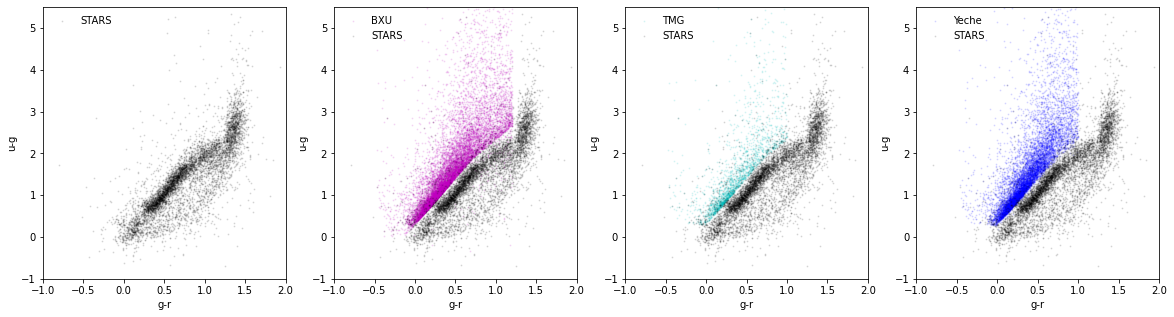

In [49]:
figure, axes = plt.subplots(1, 4, figsize=(20,5))

axes[0].plot(stars['g'] - stars['r'], stars['u'] - stars['g'], marker='.', lw=0., c='k', markersize=2, alpha=0.1, label='STARS')

axes[1].plot(bxu['g']   - bxu['r'], bxu['u'] - bxu['g'], marker='.', lw=0., c='m', markersize=2, alpha=0.1, label='BXU')
axes[1].plot(stars['g'] - stars['r'], stars['u'] - stars['g'], marker='.', lw=0., c='k', markersize=2, alpha=0.1, label='STARS')

axes[2].plot(tmg['g']   - tmg['r'], tmg['u'] - tmg['g'], marker='.', lw=0., c='c', markersize=2, alpha=0.1, label='TMG')
axes[2].plot(stars['g'] - stars['r'], stars['u'] - stars['g'], marker='.', lw=0., c='k', markersize=2, alpha=0.1, label='STARS')

axes[3].plot(gold_yeche_clauds['g'] - gold_yeche_clauds['r'], gold_yeche_clauds['u'] - gold_yeche_clauds['g'], marker='.', lw=0., c='b', markersize=2, alpha=0.1, label='Yeche')
axes[3].plot(stars['g'] - stars['r'], stars['u'] - stars['g'], marker='.', lw=0., c='k', markersize=2, alpha=0.1, label='STARS')

for ax in axes:
    ax.set_xlim((-1.0, 2.0))
    ax.set_ylim((-1.0, 5.5))

    ax.set_xlabel('g-r')
    ax.set_ylabel('u-g')

    ax.legend(frameon=False)

Here, true u-band to all.

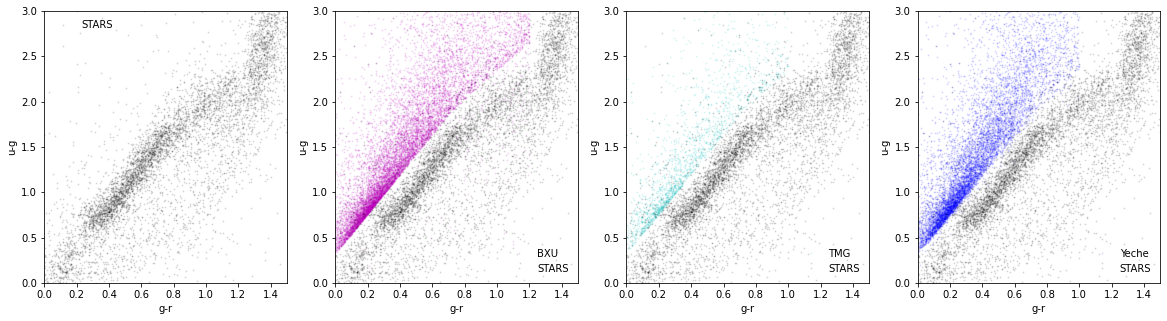

In [50]:
figure, axes = plt.subplots(1, 4, figsize=(20,5))

axes[0].plot(stars['g'] - stars['r'], stars['u'] - stars['g'], marker='.', lw=0., c='k', markersize=2, alpha=0.1, label='STARS')

axes[1].plot(bxu['g']   - bxu['r'], bxu['u'] - bxu['g'], marker='.', lw=0., c='m', markersize=2, alpha=0.1, label='BXU')
axes[1].plot(stars['g'] - stars['r'], stars['u'] - stars['g'], marker='.', lw=0., c='k', markersize=2, alpha=0.1, label='STARS')

axes[2].plot(tmg['g']   - tmg['r'], tmg['u'] - tmg['g'], marker='.', lw=0., c='c', markersize=2, alpha=0.1, label='TMG')
axes[2].plot(stars['g'] - stars['r'], stars['u'] - stars['g'], marker='.', lw=0., c='k', markersize=2, alpha=0.1, label='STARS')

axes[3].plot(gold_yeche_clauds['g'] - gold_yeche_clauds['r'], gold_yeche_clauds['u'] - gold_yeche_clauds['g'], marker='.', lw=0., c='b', markersize=2, alpha=0.1, label='Yeche')
axes[3].plot(stars['g'] - stars['r'], stars['u'] - stars['g'], marker='.', lw=0., c='k', markersize=2, alpha=0.1, label='STARS')

for ax in axes:
    ax.set_xlim((0.0, 1.5))
    ax.set_ylim((0.0, 3.0))

    ax.set_xlabel('g-r')
    ax.set_ylabel('u-g')

    ax.legend(frameon=False)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


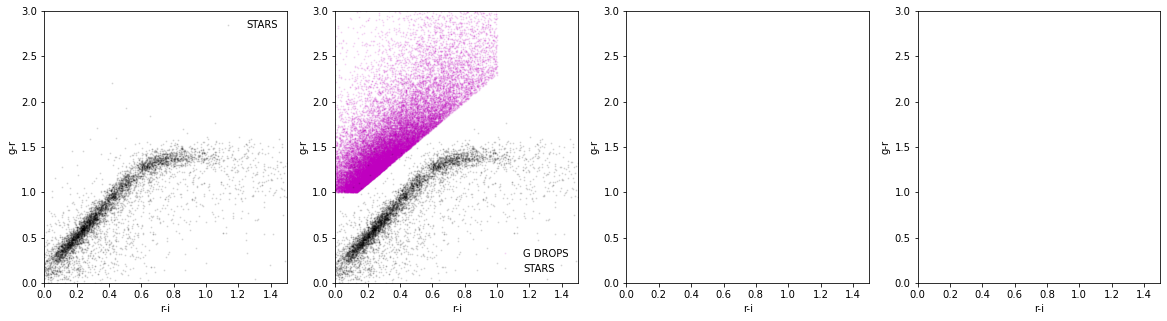

In [109]:
figure, axes = plt.subplots(1, 4, figsize=(20,5))

axes[0].plot(stars['r'] - stars['i'], stars['g'] - stars['r'], marker='.', lw=0., c='k', markersize=2, alpha=0.1, label='STARS')

axes[1].plot(gdrops['r'] - gdrops['i'], gdrops['g'] - gdrops['r'], marker='.', lw=0., c='m', markersize=2, alpha=0.1, label='G DROPS')
axes[1].plot(stars['r'] - stars['i'], stars['g'] - stars['r'], marker='.', lw=0., c='k', markersize=2, alpha=0.1, label='STARS')

for ax in axes:
    ax.set_xlim((0.0, 1.5))
    ax.set_ylim((0.0, 3.0))

    ax.set_xlabel('r-i')
    ax.set_ylabel('g-r')

    ax.legend(frameon=False)

In [64]:
# High priority.
gold_yeche_clauds_hip = gold_yeche_clauds

In [65]:
gold_yeche_clauds_hip.sort('r')

In [66]:
gold_yeche_clauds_hip = gold_yeche_clauds_hip[:2000]

In [68]:
gold_yeche_clauds_hip

ID,RA,DEC,TRACT,PATCH,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],A_WORLD,B_WORLD,KRON_RADIUS,THETA_WORLD,ELONGATION,ELLIPTICITY,EB_V,FWHM_WORLD_HSC_I,MU_MAX_HSC_I,CLASS_STAR_HSC_I,FLUX_RADIUS_0.25_HSC_I,FLUX_RADIUS_0.5_HSC_I,FLUX_RADIUS_0.75_HSC_I,FUV,NUV,u,uS,g,r,i,z,y,Yv,J,H,Ks,FUV_err,NUV_err,u_err,uS_err,g_err,r_err,i_err,z_err,y_err,Yv_err,J_err,H_err,Ks_err,MAG_APER_2s_u,MAG_APER_2s_uS,MAG_APER_2s_g,MAG_APER_2s_r,MAG_APER_2s_i,MAG_APER_2s_z,MAG_APER_2s_y,MAG_APER_2s_Yv,MAG_APER_2s_J,MAG_APER_2s_H,MAG_APER_2s_Ks,MAGERR_APER_2s_u,MAGERR_APER_2s_uS,MAGERR_APER_2s_g,MAGERR_APER_2s_r,MAGERR_APER_2s_i,MAGERR_APER_2s_z,MAGERR_APER_2s_y,MAGERR_APER_2s_Yv,MAGERR_APER_2s_J,MAGERR_APER_2s_H,MAGERR_APER_2s_Ks,MAG_APER_3s_u,MAG_APER_3s_uS,MAG_APER_3s_g,MAG_APER_3s_r,MAG_APER_3s_i,MAG_APER_3s_z,MAG_APER_3s_y,MAG_APER_3s_Yv,MAG_APER_3s_J,MAG_APER_3s_H,MAG_APER_3s_Ks,MAGERR_APER_3s_u,MAGERR_APER_3s_uS,MAGERR_APER_3s_g,MAGERR_APER_3s_r,MAGERR_APER_3s_i,MAGERR_APER_3s_z,MAGERR_APER_3s_y,MAGERR_APER_3s_Yv,MAGERR_APER_3s_J,MAGERR_APER_3s_H,MAGERR_APER_3s_Ks,OFFSET_MAG_2s,OFFSET_MAG_3s,CONTEXT,MAG_ABS_FUV,MAG_ABS_NUV,MAG_ABS_u,MAG_ABS_uS,MAG_ABS_g,MAG_ABS_r,MAG_ABS_i,MAG_ABS_z,MAG_ABS_y,MAG_ABS_Yv,MAG_ABS_J,MAG_ABS_H,MAG_ABS_Ks,Z_SPEC,Z_BEST,Z_BEST68_LOW,Z_BEST68_HIGH,NBAND_USED,CHI_BEST,CHI_STAR,CHI_QSO,MOD_BEST,MOD_STAR,MOD_QSO,Z_ML,Z_ML68_LOW,Z_ML68_HIGH,Z_SEC,Z_QSO,Z_BC03,ZPHOT,MOD_BEST_BC03,AGE_BEST,EBV_BEST,EXTLAW_BEST,AGE_MED,MASS_MED,MASS_BEST,MASS_INF,MASS_SUP,SFR_MED,SFR_BEST,SFR_INF,SFR_SUP,SSFR_MED,SSFR_BEST,SSFR_INF,SSFR_SUP,LUM_NUV_BEST,LUM_R_BEST,LUM_K_BEST,OBJ_TYPE,COMPACT,STAR_FORMING,NrK,IRX_NrK,LIR_NrK,SFR_NrK,VMAX_uS,VMAX_g,VMAX_r,VMAX_i,VMAX_Ks
int64,float64,float64,int64,bytes3,int16,int16,bool,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2701593,150.61330155313811,1.2814882473135494,9571,"7,7",0,7,True .. False,0.00015093428,0.00013741996,4.0,-24.80227,1.0984151,0.08959738,0.022053320157430157,0.00016527278,21.933676,0.97564316,0.82792085,1.2459027,1.624321,-99.0,-99.0,23.28,24.455,22.234,22.501,22.453,22.152,22.076,-99.027,-99.019,-99.012,-99.008,-99.0,-99.0,0.005,0.088,0.002,0.004,0.005,0.006,0.014,1000.0,1000.0,1000.0,1000.0,23.539705,24.711512,22.468494,22.71434,22.650305,22.339334,22.25839,-99.0,-99.0,-99.0,-99.0,0.0046653748,0.08831787,0.0022773743,0.0044555664,0.0049552917,0.0056991577,0.014289856,1000.0,1000.0,1000.0,1000.0,23.392532,24.71083,22.359684,22.611742,22.553713,22.296778,22.131645,-99.0,-99.0,-99.0,-99.0,0.0059051514,0.13171387,0.0029449463,0.0059928894,0.0067329407,0.008178711,0.01902771,1000.0,1000.0,1000.0,1000.0,-0.15352996292449111,-0.046133472993542764,2047.0,-23.042,-22.694,-23.233,-23.312,-23.515,-23.576,-23.653,-23.749,-23.798,-23.808,-23.837,-23.895,-23.619,-99.0,2.4652,2.4586,2.4644,11,606.287,806.164,469.406,31,39,29,2.4626,2.4473,2.4764,-99.0,2.48,2.4626,2.4626,10,101518000.0,0.2,1,1

In [72]:
len(np.intersect1d(gold_yeche_clauds_hip['ID'], tmg['ID']))

1516

In [90]:
rows    = []
missing = 0

for x in tmg['ID'].data: 
    ind = np.where(gold_yeche_clauds['ID'] == x)[0]
    
    if len(ind) == 0:
        missing += 1

    else:
        rows.append(ind)
        
missing

467

In [104]:
missing = tmg[~np.isin(tmg['ID'], gold_yeche_clauds['ID'])]

In [105]:
missing

ID,RA,DEC,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],EB_V,u,uS,g,r,i,z,y,Yv,J,H,Ks,u_err,uS_err,g_err,r_err,i_err,z_err,y_err,Yv_err,J_err,H_err,Ks_err,Z_BC03,Z_SPEC,IDX
int64,float64,float64,int16,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
187353,149.21004001927372,3.1048311728256377,0,7,True .. False,0.023687506772805567,24.17,24.214,22.832,22.504,22.51,22.28,22.091,-99.029,-99.021,-99.013,-99.009,0.014,0.058,0.004,0.004,0.006,0.007,0.015,1000.0,1000.0,1000.0,1000.0,2.6679,-99.0,-99
2919769,149.25140478616885,1.6349077897107656,0,7,True .. False,0.01745520654354046,24.138,22.482,22.718,22.507,22.441,22.333,21.908,21.109,-99.015,21.248,-99.006,0.058,0.021,0.02,0.028,0.033,0.044,0.074,1000.0,-99.0,1000.0,-99.0,2.3008,-99.0,-99
2723113,150.63306242302343,1.4872612320215974,0,7,True .. False,0.021505346589977825,25.725,25.283,23.463,22.525,22.117,21.881,21.86,-99.026,-99.019,-99.012,-99.008,0.041,0.043,0.006,0.004,0.003,0.004,0.008,1000.0,1000.0,1000.0,1000.0,0.1,-99.0,-99
533413,150.82461153538748,3.0239246381457603,0,7,True .. False,0.01797897440632107,23.179,23.361,22.589,22.529,22.044,21.918,21.92,-99.022,-99.016,-99.01,-99.007,0.004,0.012,0.003,0.004,0.003,0.004,0.01,1000.0,1000.0,1000.0,1000.0,1.9442,-99.0,-99
4545674,149.80065852249126,1.870400119408006,0,127,True .. True,0.01773821763967031,24.203,23.888,22.957,22.547,22.698,22.496,22.28,22.322,22.091,21.941,21.686,0.011,0.009,0.004,0.003,0.004,0.005,0.008,0.005,0.005,0.005,0.006,2.947,2.947,-99
281969,148.94066654619888,3.1817781279042285,0,3,True .. False,0.018371882773363733,23.009,-99.086,22.54,22.548,22.222,22.094,22.229,-99.022,-99.016,-99.01,-99.007,0.005,1000.0,0.004,0.005,0.005,0.007,0.019,1000.0,1000.0,1000.0,1000.0,2.0169,-99.0,-99
4837293,149.66607919597,2.74022802868132,0,95,True .. True,0.01668728691125417,25.311,24.528,22.824,22.556,22.613,22.596,22.474,22.432,22.198,22.14,21.767,0.037,0.019,0.003,0.003,0.003,0.005,0.009,0.008,0.008,0.01,0.01,3.1234,-99.0,-99
4319822,150.2527659799741,2.8231005032974634,0,71,True .. True,0.01630317233553507,25.405,24.955,23.342,22.559,22.239,22.046,21.972,22.014,22.015,21.751,22.195,0.031,0.035,0.004,0.002,0.002,0.003,0.005,0.025,0.04,0.039,0.1,0.01,-99.0,-99
5251488,150.9339813333849,1.5053436723940528,0,7,True .. False,0.02273738190066924,23.944,23.79,22.888,22.56,22.305,22.18,22.162,-99.028,-99.02,-99.013,-99.008,0.016,0.024,0.009,0.009,0.009,0.012,0.03,1000.0,1000.0,1000.0,1000.0,0.098,-99.0,-99


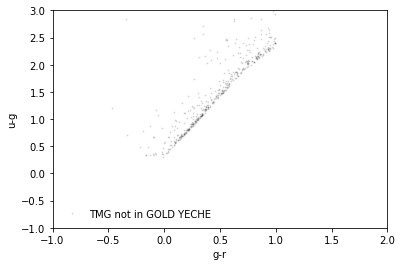

In [106]:
pl.plot(missing['g'] - missing['r'], missing['u'] - missing['g'], marker='.', lw=0., c='k', markersize=2, alpha=0.1, label='TMG not in GOLD YECHE')

pl.xlim((-1.0, 2.0))
pl.ylim((-1.0, 3.0))

pl.xlabel('g-r')
pl.ylabel('u-g')

pl.legend(frameon=False)

Text(0.5, 0, 'r')

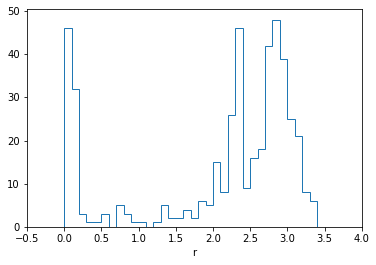

In [108]:
pl.hist(missing['Z_BC03'], bins=np.arange(0.0, 6.0, 0.1), histtype='step', label='TMG not in Gold Yeche')
pl.xlim(-0.5, 4.0)
pl.xlabel('r')

# Done.